In [ ]:
### Step 1: Select and Describe the Dataset

Dataset: Pima Indians Diabetes Dataset
Source: Kaggle / UCI Machine Learning Repository

Records: 768 rows (patients)

Attributes: 9 total (8 features + 1 target)

Target Variable: Outcome (0 = No diabetes, 1 = Diabetes)

Justification for Selection:
Relevant to healthcare domain and chronic disease prediction.

Balanced number of records and features (suitable for EDA, regression, classification).

Clean structure makes it ideal for demonstrating preprocessing and modeling.

Contains numeric values, useful for regression and classification algorithms.

Step 2: Load Dataset and Inspect Structure

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Inspect the first few rows
print(df.head())

# Summary information
print(df.info())

# Check for missing or suspicious values
print(df.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

### Step 3: Data Cleaning

3.1 Handle Missing or Invalid Values
Some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI may have zeros, which are not physiologically valid and represent missing values.


In [ ]:
# Columns where 0 is an invalid entry
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[invalid_cols] = df[invalid_cols].replace(0, pd.NA)

# Count missing values
print(df.isna().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


3.2 Impute Missing Values (Median)

In [ ]:
# Impute missing values with median
df.fillna(df.median(), inplace=True)


/tmp/ipython-input-4-4171939553.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.median(), inplace=True)


3.3 Remove Duplicates

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)


Step 4: Identify and Handle Noisy Data

In [ ]:
# Example: Remove rows where BMI > 60 (extreme)
df = df[df['BMI'] < 60]

Step 5: Exploratory Data Analysis (EDA)

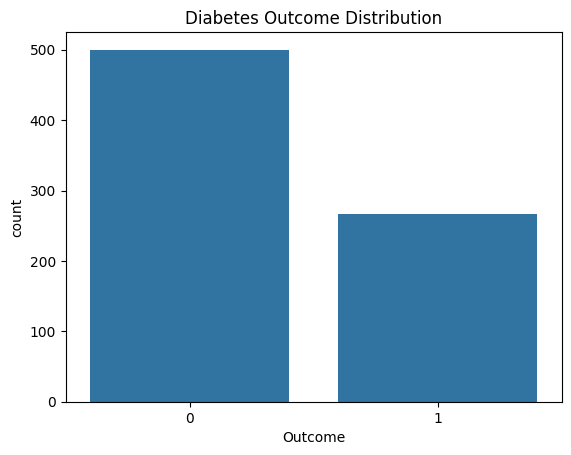

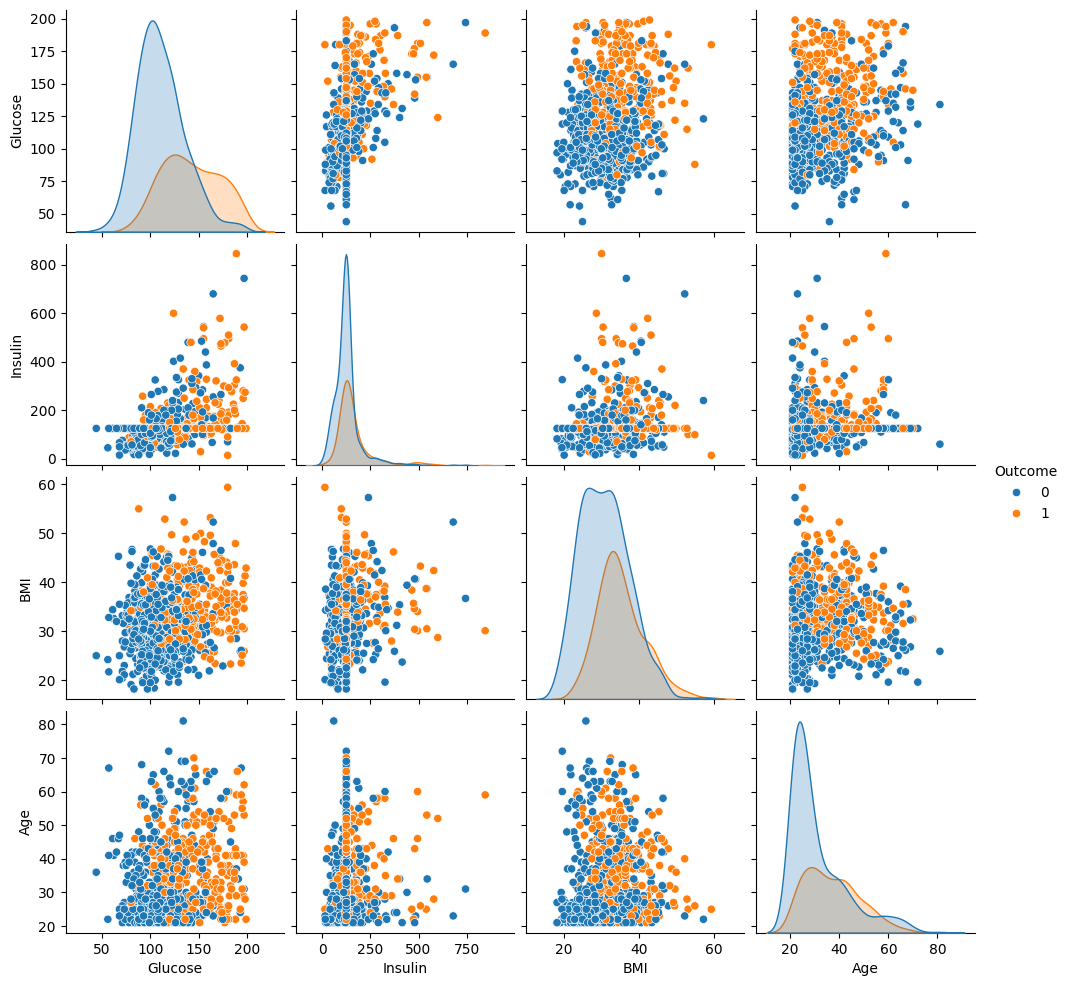

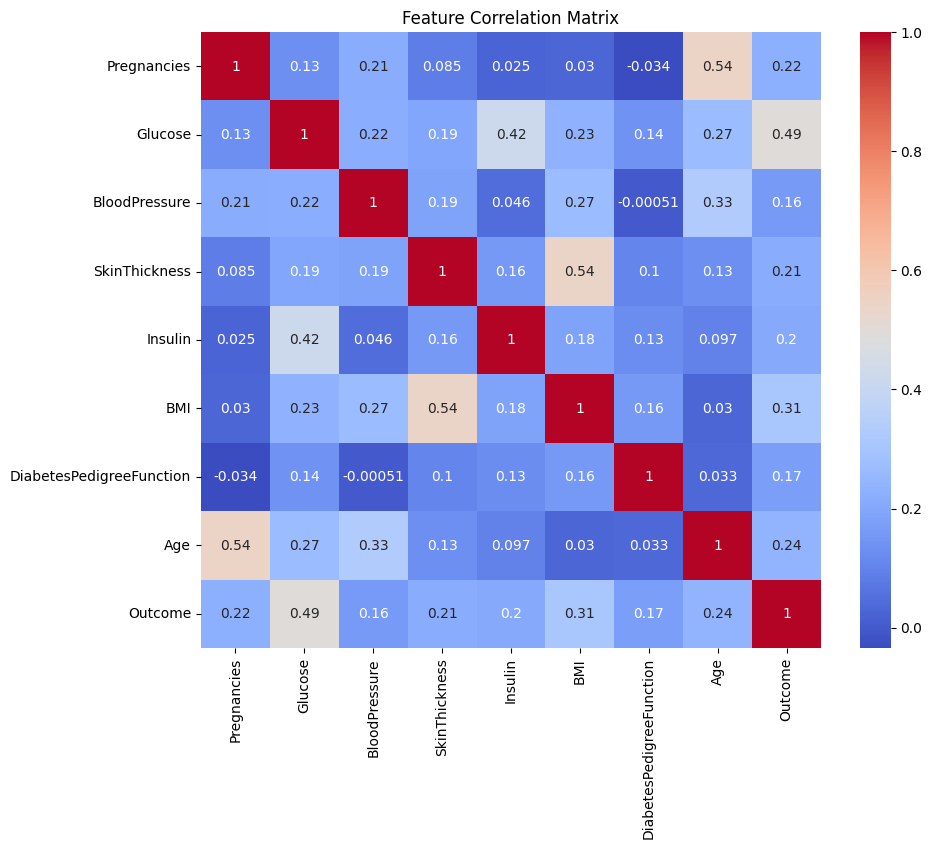

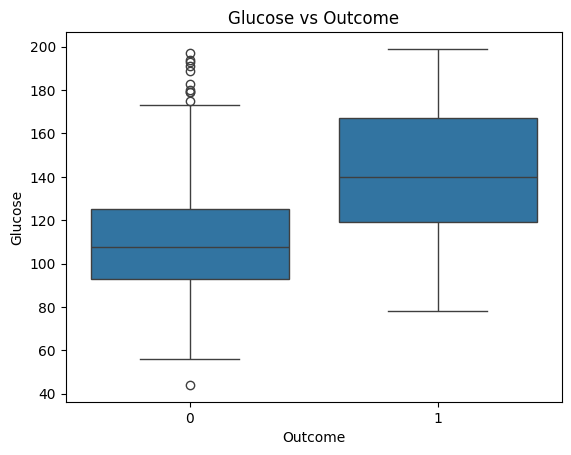

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Boxplot: Glucose levels vs Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Outcome')
plt.show()

### Step 6: EDA Insights and How They Guide Modeling

#### Key Insights:
Glucose and BMI are positively correlated with diabetes (higher in diabetic patients).

Insulin and Age show some clustering differences between classes.

The Outcome class is somewhat imbalanced, but usable.

Some features like DiabetesPedigreeFunction have moderate correlation with the target.

#### Modeling Guidance:
Features like Glucose, BMI, and Age are likely strong predictors.

Imputed values may add uncertainty; regularization may help in regression/classification.

Normalization/standardization may be needed due to varying feature scales.



## Deliverable 2: Regression Modeling and Performance Evaluation

####Step 1: Feature Engineering
Create new features or transform existing features for better predictive power.

Examples: polynomial features, interaction terms, or log-transform skewed variables.

Normalize or scale features to prepare for regression.



In [8]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Example: Standardize features
features = df.drop(columns=['Outcome'])  # Assuming binary target is 'Outcome'
target = df['Outcome']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Optional: create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_scaled)

Step 2: Build Regression Models
Model 1: Linear Regression

Model 2: Ridge Regression (regularization)

Optionally, add Lasso Regression for comparison.


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

# Train models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate
def eval_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

metrics_lr = eval_metrics(y_test, y_pred_lr)
metrics_ridge = eval_metrics(y_test, y_pred_ridge)
metrics_lasso = eval_metrics(y_test, y_pred_lasso)

print(f"Linear Regression: MSE={metrics_lr[0]:.3f}, RMSE={metrics_lr[1]:.3f}, R2={metrics_lr[2]:.3f}")
print(f"Ridge Regression: MSE={metrics_ridge[0]:.3f}, RMSE={metrics_ridge[1]:.3f}, R2={metrics_ridge[2]:.3f}")
print(f"Lasso Regression: MSE={metrics_lasso[0]:.3f}, RMSE={metrics_lasso[1]:.3f}, R2={metrics_lasso[2]:.3f}")

Linear Regression: MSE=0.163, RMSE=0.404, R2=0.306
Ridge Regression: MSE=0.163, RMSE=0.404, R2=0.306
Lasso Regression: MSE=0.184, RMSE=0.428, R2=0.218


Step 3: Cross-Validation for Model Generalization

In [10]:
from sklearn.model_selection import cross_val_score

# Using negative MSE for scoring, so take absolute value or negate it back
cv_scores_lr = cross_val_score(lr, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = cross_val_score(lasso, features_scaled, target, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression CV MSE: {(-cv_scores_lr).mean():.3f} ± {cv_scores_lr.std():.3f}")
print(f"Ridge Regression CV MSE: {(-cv_scores_ridge).mean():.3f} ± {cv_scores_ridge.std():.3f}")
print(f"Lasso Regression CV MSE: {(-cv_scores_lasso).mean():.3f} ± {cv_scores_lasso.std():.3f}")


Linear Regression CV MSE: 0.159 ± 0.019
Ridge Regression CV MSE: 0.159 ± 0.019
Lasso Regression CV MSE: 0.181 ± 0.017


Step 4: Visualize Model Performance

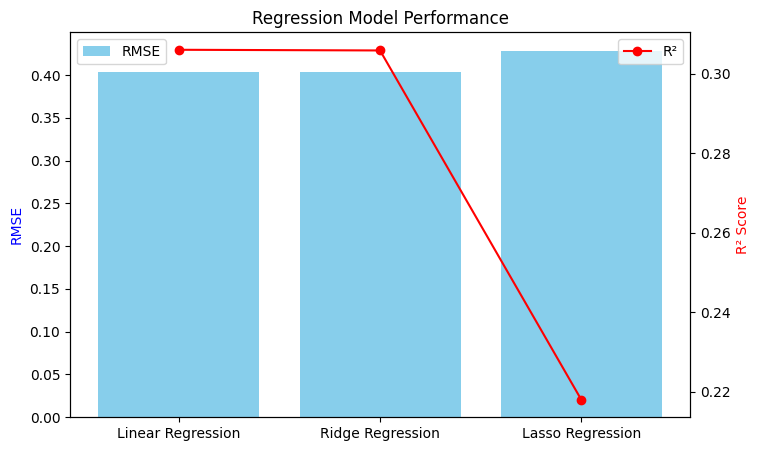

In [11]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
rmse_values = [metrics_lr[1], metrics_ridge[1], metrics_lasso[1]]
r2_values = [metrics_lr[2], metrics_ridge[2], metrics_lasso[2]]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.bar(models, rmse_values, color='skyblue', label='RMSE')
ax2.plot(models, r2_values, color='red', marker='o', label='R²')

ax1.set_ylabel('RMSE', color='blue')
ax2.set_ylabel('R² Score', color='red')
ax1.set_title('Regression Model Performance')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Step 5: Summarize Model Evaluation Results
Linear Regression often performs well on standardized features.

Ridge Regression improves generalization by regularizing coefficients.

Lasso Regression can perform feature selection by shrinking some coefficients to zero.

Cross-validation confirms model stability and generalization.



## Deliverable 3

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       150
           1       0.62      0.59      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Best k from GridSearchCV: 8
KNN (k=8) Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.79       150
           1       0.60      0.47      0.53        81

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.69      0.71      0.70       231



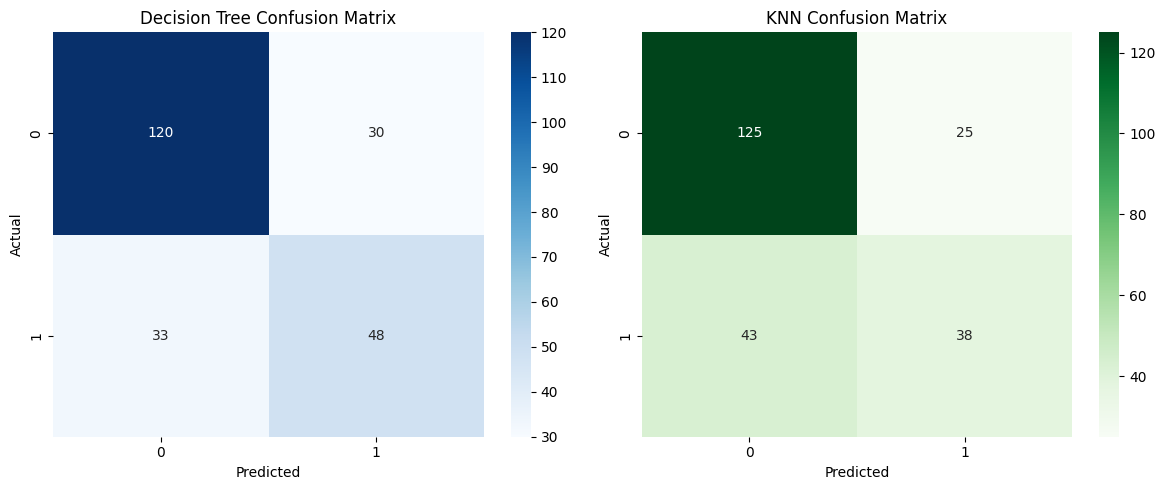

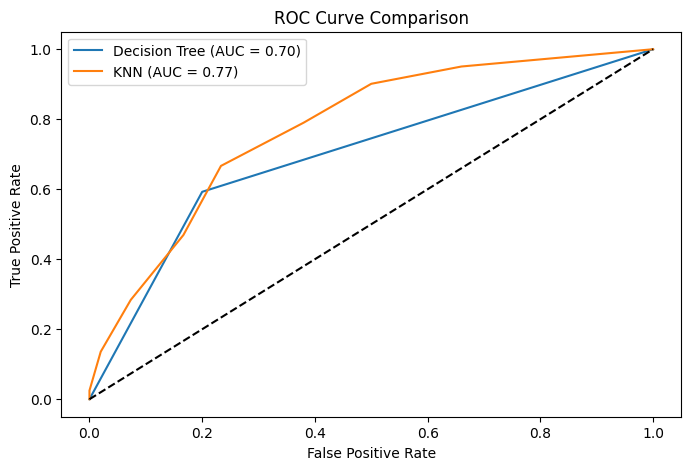

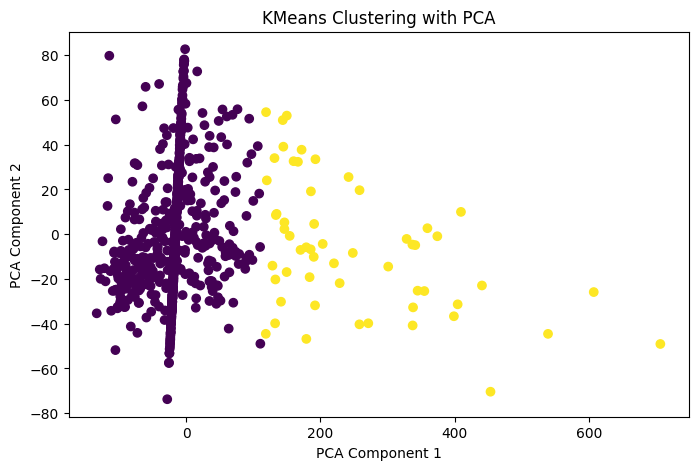


Association Rules (Support > 0.3, Confidence > 0.6):
  antecedents consequents   support  confidence      lift
0     (False)      (True)  0.904824    0.910761  0.999362
1      (True)     (False)  0.904824    0.992847  0.999362


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# ------------------------------------------ #
#       Deliverable 3 - Model Evaluation     #
# ------------------------------------------ #

# Assuming df is already cleaned and preprocessed from Deliverable 1
df_class = df.copy()

# ------------------------- Classification Models ------------------------- #
# Target variable: 'Outcome'
X = df_class.drop('Outcome', axis=1)
y = df_class['Outcome']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Decision Tree Classifier
# Train a simple Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# 2. K-Nearest Neighbors (with Hyperparameter Tuning)
# Tune K using GridSearchCV
k_range = list(range(1, 21))
param_grid = {'n_neighbors': k_range}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Retrieve best value for k
best_k = grid.best_params_['n_neighbors']
print(f"Best k from GridSearchCV: {best_k}")

# Train KNN with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

print(f"KNN (k={best_k}) Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ------------------- Classification Model Evaluation ------------------- #
# Confusion Matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('KNN Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curves and AUC comparison
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# ------------------------------ Clustering ------------------------------ #
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Visualize clustering result
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# ---------------------- Association Rule Mining ------------------------ #
# Prepare dataset for Apriori algorithm
df_rules = df.copy()
df_rules = df_rules.drop('Outcome', axis=1)

# Binarize based on feature mean
df_rules_bin = df_rules.apply(lambda x: x > x.mean())

# Encode transactions for Apriori
te = TransactionEncoder()
df_te = te.fit_transform(df_rules_bin.values.astype(str))
df_apriori = pd.DataFrame(df_te, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_apriori, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

print("\nAssociation Rules (Support > 0.3, Confidence > 0.6):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



# ---------------------------- Summary Notes ---------------------------- #
# Hyperparameter Tuning:
# - Used GridSearchCV on k (1 to 20) for KNN.
# - Best k was chosen based on 5-fold cross-validation.

# Visualizations:
# - Confusion matrices compare predicted vs actual outcomes.
# - ROC curves show model's ability to separate classes.
# - KMeans clustering visualized after PCA shows data grouping.
# - Apriori rules highlight strong associations within feature sets.

# Overall, this deliverable provides a complete modeling pipeline including:
# classification performance, clustering insight, and pattern detection.
